In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\Fifa_Worldcup_2014_Group.csv')
rk = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\fifa_ranking-2022-10-06.csv')
mt=pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\results.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Group                 32 non-null     object
 1   Team                  32 non-null     object
 2   Country_Name_Short    32 non-null     object
 3   First match against   32 non-null     object
 4   Second match against  32 non-null     object
 5   Third match against   32 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [4]:
df.head(10)

,Group,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,Brazil,BRA,Croatia,Mexico,Cameroon
1,A,Cameroon,CAM,Mexico,Croatia,Brazil
2,A,Mexico,MEX,Cameroon,Brazil,Croatia
3,A,Croatia,CRO,Brazil,Cameroon,Mexico
4,B,Spain,ESP,Netherlands,Chile,Australia
5,B,Netherlands,NED,Spain,Australia,Chile
6,B,Chile,CHI,Australia,Spain,Netherlands
7,B,Australia,AUS,Chile,Netherlands,Spain
8,C,Colombia,COL,Greece,Ivory Coast,Japan
9,C,Greece,GRE,Colombia,Japan,Ivory Coast


In [5]:
df.isnull().values.any()

False

In [6]:
df.isna().sum()

Group                   0
Team                    0
Country_Name_Short      0
First match against     0
Second match against    0
Third match against     0
dtype: int64

In [7]:
df['Group'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [8]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [9]:
rk.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,12/31/1992
1,96,Syria,SYR,11.0,0.0,0,AFC,12/31/1992
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,12/31/1992
3,99,Latvia,LVA,10.0,0.0,0,UEFA,12/31/1992
4,100,Burundi,BDI,10.0,0.0,0,CAF,12/31/1992
5,101,Togo,TOG,10.0,0.0,0,CAF,12/31/1992
6,102,Angola,ANG,10.0,0.0,0,CAF,12/31/1992
7,95,Suriname,SUR,12.0,0.0,0,CONCACAF,12/31/1992
8,103,Luxembourg,LUX,10.0,0.0,0,UEFA,12/31/1992
9,105,St. Vincent and the Grenadines,VIN,9.0,0.0,0,CONCACAF,12/31/1992


In [10]:
mt.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
rk['country_abrv'].unique()

array(['GER', 'SYR', 'BFA', 'LVA', 'BDI', 'TOG', 'ANG', 'SUR', 'LUX',
       'VIN', 'FIJ', 'MOZ', 'IDN', 'ATG', 'JOR', 'SWZ', 'FRO', 'LTU',
       'UGA', 'PRK', 'PER', 'SLE', 'TAN', 'NIG', 'IRQ', 'GUA', 'LBR',
       'ETH', 'ALB', 'BOL', 'BHR', 'SGP', 'CGO', 'MAS', 'SDN', 'CRO',
       'BRB', 'YEM', 'CPV', 'SOL', 'LBY', 'BOT', 'BRU', 'DOM', 'LES',
       'IND', 'CUB', 'PAK', 'BLR', 'SEY', 'CTA', 'NEP', 'GAM', 'MTN',
       'KEN', 'BAN', 'SVN', 'OMA', 'GNB', 'LCA', 'HKG', 'PAN', 'GRN',
       'PUR', 'TAH', 'RSA', 'VEN', 'SMR', 'BEN', 'GUY', 'UKR', 'HAI',
       'EST', 'THA', 'MRI', 'MLT', 'EGY', 'CMR', 'SCO', 'USA', 'MEX',
       'BUL', 'CIV', 'WAL', 'YUG', 'ALG', 'GRE', 'ZAM', 'POR', 'AUT',
       'COL', 'BEL', 'HUN', 'TCH', 'URU', 'MAD', 'ITA', 'BRA', 'SWE',
       'ENG', 'IRL', 'NED', 'RUS', 'DEN', 'ARG', 'ROU', 'SUI', 'NGA',
       'NOR', 'ESP', 'FRA', 'CRC', 'POL', 'CYP', 'CAN', 'BER', 'UAE',
       'ZAI', 'IRN', 'GUI', 'ISR', 'ECU', 'JPN', 'JAM', 'PAR', 'MLI',
       'NZL', 'KUW',

In [12]:
result = rk.groupby('country_abrv')['total_points'].sum()

In [13]:
result

country_abrv
AFG     55322.70
AIA     33264.44
ALB    162745.60
ALG    192109.31
AND     66876.16
         ...    
YEM     85187.46
YUG     33665.00
ZAI      7344.00
ZAM    163424.78
ZIM    136368.81
Name: total_points, Length: 217, dtype: float64

In [14]:
mt['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

In [15]:
mt.shape

(44060, 9)

In [16]:
mt = mt[mt['tournament'] != 'Friendly']
mt.shape

(26635, 9)

In [17]:
rk['rank_date'] = pd.to_datetime(rk['rank_date'])
mt['date'] = pd.to_datetime(mt['date'])

In [18]:
import datetime

rk['year'] = rk['rank_date'].dt.year
mt['year'] = mt['date'].dt.year
rankings_sub = rk[rk['rank_date'] > '2009-08-24']
matches_sub = mt[mt['date'] > '2009-08-24']

In [19]:
rankings_sub = rankings_sub[['rank', 'country_full', 'total_points', 'year']]
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'total_points': 'mean'})

matches_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
31839,2009-08-25,Hong Kong,North Korea,0.0,0.0,EAFF Championship,Kaohsiung,Taiwan,True,2009
31840,2009-08-25,Kyrgyzstan,Lebanon,1.0,1.0,Nehru Cup,New Delhi,India,True,2009
31842,2009-08-26,India,Sri Lanka,3.0,1.0,Nehru Cup,New Delhi,India,False,2009
31843,2009-08-27,Hong Kong,Guam,12.0,0.0,EAFF Championship,Kaohsiung,Taiwan,True,2009
31844,2009-08-27,Syria,Lebanon,1.0,0.0,Nehru Cup,New Delhi,India,True,2009


In [20]:
matches_all = matches_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all = matches_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,rank_x,total_points_x,rank_y,total_points_y
0,Hong Kong,Guam,12.0,0.0,True,134.75,175.50,185.25,34.00
1,Hong Kong,Japan,0.0,4.0,False,134.75,175.50,41.50,721.75
2,India,Sri Lanka,3.0,1.0,False,139.00,153.75,155.50,107.25
3,Bangladesh,Sri Lanka,2.0,1.0,False,161.50,93.00,155.50,107.25
4,Maldives,Sri Lanka,5.0,1.0,True,146.50,131.00,155.50,107.25


In [21]:
matches_all['total_diff'] = matches_all['total_points_x'] - matches_all['total_points_y']
matches_all['rank_diff'] = matches_all['rank_x'] - matches_all['rank_y']
matches_all['neutral'] = matches_all['neutral'].astype(int)
matches_all['is_win'] = (matches_all['home_score'] - matches_all['away_score']).apply(lambda x: 1 if x>0 else 0)
train = matches_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)
train.head()

,neutral,rank_x,total_points_x,rank_y,total_points_y,total_diff,rank_diff,is_win
0,1,134.75,175.50,185.25,34.00,141.50,-50.50,1
1,0,134.75,175.50,41.50,721.75,-546.25,93.25,0
2,0,139.00,153.75,155.50,107.25,46.50,-16.50,1
3,0,161.50,93.00,155.50,107.25,-14.25,6.00,1
4,1,146.50,131.00,155.50,107.25,23.75,-9.00,1


In [22]:
train_X = train.drop('is_win', axis=1)
train_y = train['is_win']

In [23]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=300),
              'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=.01),
              'Logistic Regression': LogisticRegression(C=1e-5)}

Running Random Forest
Running LightGBM
Running Logistic Regression


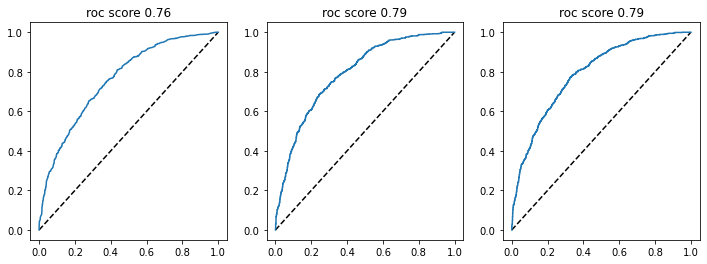

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3)

fig = plt.figure(figsize=[12, 4])
for i, (name, clf) in enumerate(classifiers.items()):
    print('Running', name)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plot
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('roc score {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

<AxesSubplot:title={'center':'y_pred'}, xlabel='[y_true]'>

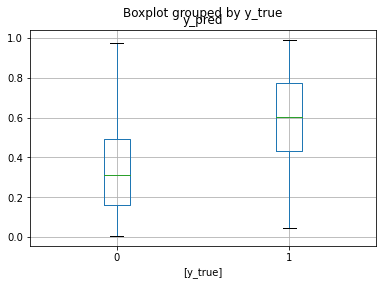

In [27]:
pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}).boxplot(by='y_true')

In [28]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(train_X, train_y)

lr = LogisticRegression(C=1e-5)
lr = lr.fit(train_X, train_y)

lgb = LGBMClassifier(n_estimators=300, learning_rate=.01)
lgb = lgb.fit(train_X, train_y)

Strong team not always wins, higher probability only gives better wining chance

In [29]:
world_cup_rankings = df[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2014], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings.head()

,Group,year,rank,total_points
Team,,,,
Brazil,A,2014,6.583333,1222.416667
Cameroon,A,2014,47.833333,595.666667
Mexico,A,2014,19.000000,909.750000
Croatia,A,2014,17.500000,939.833333
Spain,B,2014,4.750000,1335.750000


In [30]:
world_cup_rankings['Points'] = 0
for group in world_cup_rankings['Group'].unique():
    print('*******************************')
    print('Simulating Group', group)
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    for home, away in combinations(group_teams, 2):
        print('//*************************//')
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = world_cup_rankings.loc[home, 'total_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['total_points_y'] = world_cup_rankings.loc[away, 'total_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
        # if y_pred in [0.4, 0.55] then draw
        if (y_pred > 0.4) & (y_pred < 0.55):
            print('Draw')
            world_cup_rankings.loc[home, 'Points'] += 1
            world_cup_rankings.loc[away, 'Points'] += 1
        else:
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                world_cup_rankings.loc[home, 'Points'] += 3
                print('{} wins!'.format(home))
            else:
                world_cup_rankings.loc[away, 'Points'] += 3
                print('{} wins!'.format(away))

*******************************
Simulating Group A
//*************************//
Brazil vs Cameroon
Brazil wins!
//*************************//
Brazil vs Mexico
Draw
//*************************//
Brazil vs Croatia
Draw
//*************************//
Cameroon vs Mexico
Cameroon wins!
//*************************//
Cameroon vs Croatia
Croatia wins!
//*************************//
Mexico vs Croatia
Draw
*******************************
Simulating Group B
//*************************//
Spain vs Netherlands
Netherlands wins!
//*************************//
Spain vs Chile
Chile wins!
//*************************//
Spain vs Australia
Spain wins!
//*************************//
Netherlands vs Chile
Chile wins!
//*************************//
Netherlands vs Australia
Netherlands wins!
//*************************//
Chile vs Australia
Chile wins!
*******************************
Simulating Group C
//*************************//
Colombia vs Greece
Colombia wins!
//*************************//
Colombia vs Japan
Col

In [31]:
world_cup_rankings

,Group,year,rank,total_points,Points
Team,,,,,
Brazil,A,2014,6.583333,1222.416667,5
Cameroon,A,2014,47.833333,595.666667,3
Mexico,A,2014,19.000000,909.750000,2
Croatia,A,2014,17.500000,939.833333,5
Spain,B,2014,4.750000,1335.750000,3
Netherlands,B,2014,8.333333,1233.500000,6
Chile,B,2014,13.500000,1043.083333,9
Australia,B,2014,73.916667,458.000000,0
Colombia,C,2014,4.250000,1324.833333,6


In [32]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,year,rank,total_points,Points
Team,,,,,
Brazil,A,2014,6.583333,1222.416667,5
Croatia,A,2014,17.500000,939.833333,5
Chile,B,2014,13.500000,1043.083333,9
Netherlands,B,2014,8.333333,1233.500000,6
Colombia,C,2014,4.250000,1324.833333,6
Greece,C,2014,14.666667,1024.833333,3
Italy,D,2014,10.333333,1097.000000,9
Costa Rica,D,2014,24.250000,868.833333,4
France,E,2014,7.833333,1243.750000,7


In [33]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

In [34]:
final_teams = final_teams.iloc[pairing]

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
for f in finals:
    print('######################################')
    print('Simulation of {}'.format(f))
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = final_teams.loc[home, 'total_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['total_points_y'] = final_teams.loc[away, 'total_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
       
         # give a sense of randomness
        is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
        if is_win:
            winners.append(home)
            print('{} wins!'.format(home))
        else:
            winners.append(away)
            print('{} wins!'.format(away))
    final_teams = final_teams.loc[winners]
print('*******************************')
print('The Champion of 2014 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))

######################################
Simulation of round_of_16
Brazil vs Netherlands
Brazil wins!
Colombia vs Costa Rica
Costa Rica wins!
Croatia vs Chile
Croatia wins!
Greece vs Italy
Italy wins!
France vs Nigeria
France wins!
Portugal vs Belgium
Portugal wins!
Switzerland vs Argentina
Switzerland wins!
Ghana vs Russia
Russia wins!
######################################
Simulation of quarterfinal
Brazil vs Costa Rica
Costa Rica wins!
Croatia vs Italy
Italy wins!
France vs Portugal
France wins!
Switzerland vs Russia
Russia wins!
######################################
Simulation of semifinal
Costa Rica vs Italy
Italy wins!
France vs Russia
France wins!
######################################
Simulation of final
Italy vs France
Italy wins!
*******************************
The Champion of 2014 World Cup is Italy!!!!!!!!!!!!!!!!!!!!!!!


### So one simulation may have some kind of accident, compile the whole simulation process to perform multiple simulations

In [35]:
def pred_wining(dat, home, away):
    row = pd.DataFrame(columns=train_X.columns)
    row.loc[0, 'neutral'] = 1
    row['total_points_x'] = dat.loc[home, 'total_points']
    row['rank_x'] = dat.loc[home, 'rank']
    row['total_points_y'] = dat.loc[away, 'total_points']
    row['rank_y'] = dat.loc[away, 'rank']
    row['total_diff'] = row['total_points_x'] - row['total_points_y']
    row['rank_diff'] = row['rank_x'] - row['rank_y']
    
    y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
    return y_pred

def main():
    # Group Stage
    world_cup_rankings['Points'] = 0
    for group in world_cup_rankings['Group'].unique():
        group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
        for home, away in combinations(group_teams, 2):
            # get wining probability
            y_pred = pred_wining(world_cup_rankings, home, away)
            # if y_pred in [0.4, 0.55] then draw
            if (y_pred > 0.4) & (y_pred < 0.55):
                world_cup_rankings.loc[home, 'Points'] += 1
                world_cup_rankings.loc[away, 'Points'] += 1
            else:
                # give a sense of randomness
                is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
                if is_win:
                    world_cup_rankings.loc[home, 'Points'] += 3
                else:
                    world_cup_rankings.loc[away, 'Points'] += 3
    # Eliminating Stage
    final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
    final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
    final_teams.set_index('Team', inplace=True)
    final_teams = final_teams.iloc[pairing]
    
    for f in finals:
        winners = []
        rds = int(len(final_teams)/2)
        for i in range(rds):
            home = final_teams.index[2*i]
            away = final_teams.index[2*i+1]
            y_pred = pred_wining(world_cup_rankings, home, away)
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                winners.append(home)
            else:
                winners.append(away)
        final_teams = final_teams.loc[winners]
    print('The Champion of 2014 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))
    return winners[0]

In [36]:
num_simulations = 100
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

In [37]:
if __name__ == '__main__':
    champions = []
    for sim in range(num_simulations):
        print('######## Simulation {} ########'.format(sim+1))
        champions.append(main())

######## Simulation 1 ########
The Champion of 2014 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 2 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 3 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 4 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 5 ########
The Champion of 2014 World Cup is Argentina!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 6 ########
The Champion of 2014 World Cup is Portugal!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 7 ########
The Champion of 2014 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 8 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 9 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 10 ########
The Champion of 2014 World Cup is Portugal!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 11 ########
The

The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 87 ########
The Champion of 2014 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 88 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 89 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 90 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 91 ########
The Champion of 2014 World Cup is Switzerland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 92 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 93 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 94 ########
The Champion of 2014 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 95 ########
The Champion of 2014 World Cup is Argentina!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 96 ########
The Champion of 2014 Worl

In [38]:
import gc
gc.collect()

792

<AxesSubplot:title={'center':'World Cup Champion 2014'}>

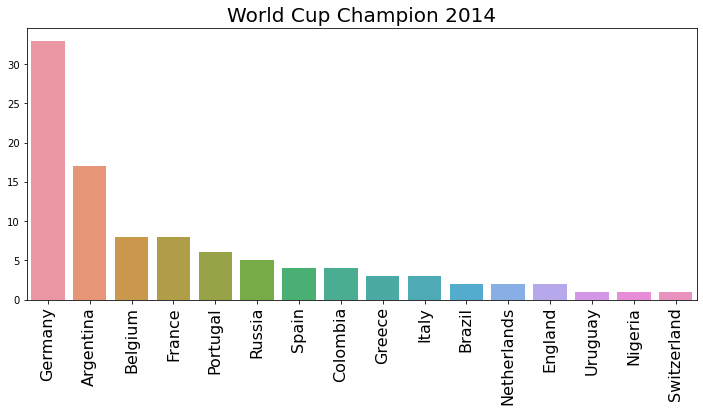

In [39]:
from collections import Counter
import operator
import matplotlib
import seaborn as sns

sorted_champ = Counter(champions).most_common()

fig, ax = plt.subplots(figsize=[12, 5])
plt.xticks(rotation=90, size=16)
ax.set_title('World Cup Champion 2014', size=20)
sns.barplot(x=[t[0] for t in sorted_champ], y=[t[1] for t in sorted_champ], ax=ax)